In [3]:
import pandas as pd
import numpy as np
from mlxtend.evaluate import bias_variance_decomp
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split

In [4]:
#!pip install mlxtend

In [5]:
df=pd.read_csv("c:/csv-ml/boston_dataset.csv")

In [6]:
df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [7]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

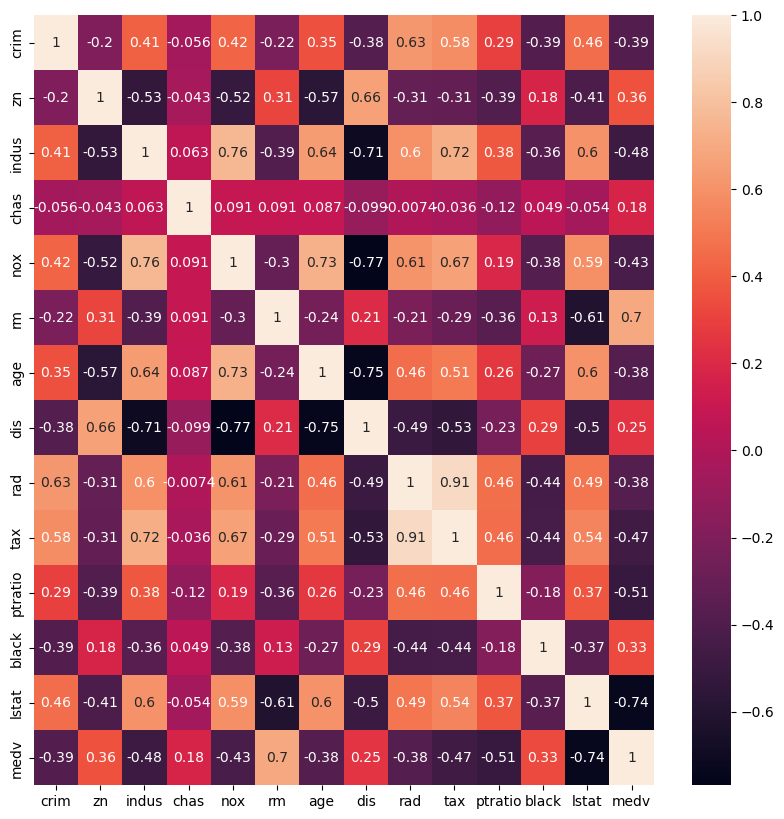

In [9]:
#correlation plot
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [11]:
#splitting dataframe to features x and taget variable y
x=df.drop("medv",axis=1)
y=df["medv"]

In [12]:
x.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat'],
      dtype='object')

In [23]:
#splitting data into train and test set
df_tr,df_test=train_test_split(df,test_size=.2,random_state=100)
x_tr,x_test,y_tr,y_test=train_test_split(x,y,test_size=.2,random_state=100)

In [35]:
#multiple linear regresion model
from statsmodels.formula.api import ols
i=0
model={}



In [36]:
#full model ols
model_ols=ols("medv~crim+zn+indus+chas+nox+rm+age+dis+rad+tax+ptratio+black+lstat",data=df_tr).fit()
model_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     82.67
Date:                Tue, 07 Feb 2023   Prob (F-statistic):          2.38e-103
Time:                        05:29:41   Log-Likelihood:                -1194.4
No. Observations:                 404   AIC:                             2417.
Df Residuals:                     390   BIC:                             2473.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.3338      5.723      6.349      0.000      25.082      47.585
crim          -0.0815      0.044     -1.870      0.062      -0.167       0.004
zn             0.0480      0.015      3.127      0.002       0.018       0.078
indus         -0.0055      0.070     -0.078      0.938      -0.144       0.133
chas           3.0626      0.915      3.345      0.001       1.263       4.862
nox          -16.1369      4.262     -3.786      0.000     -24.516      -7.758
rm             3.6725      0.473      7.765      0.000       2.743       4.602
age           -0.0085      0.015     -0.573      0.567      -0.038       0.021
dis           -1.5174      0.228     -6.660      0.000      -1.965      -1.069
rad            0.2873      0.074      3.888      0.000       0.142       0.433
tax           -0.0121      0.004     -2.893      0.004      -0.020      -0.004
ptratio       -0.9242      0.148     -6.241      0.000      -1.215      -0.633
black          0.0095      0.003      3.006      0.003       0.003       0.016
lstat         -0.4859      0.057     -8.518      0.000      -0.598      -0.374
==============================================================================
Omnibus:                      134.941   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              517.166
Skew:                           1.452   Prob(JB):                    5.00e-113
Kurtosis:                       7.722   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
model_ols.bic

2472.8127194089416

In [45]:
model_ols.aic

2416.7929111174853

In [41]:
import numpy as np
lin_model=LinearRegression()
ms,b,v=bias_variance_decomp(lin_model,x_tr.values,y_tr.values,x_test.values,y_test.values,loss="mse",random_seed=100)
n=len(y)
num_params=len(lin_model.coef_) + 1
aic = n * np.log(ms) + 2 * num_params
bic = n * np.log(ms) + num_params * np.log(n)

In [49]:
from sklearn.metrics import r2_score
lin_model=LinearRegression().fit(x_tr,y_tr)
pred_tr=lin_model.predict(x_tr)
pred_test=lin_model.predict(x_test)
r_sq_tr=r2_score(y_tr,pred_tr)
r_sq_test=r2_score(y_test,pred_test)

In [50]:
model["no"]=1
model["name"]="sklearn"
model["aic"]=aic
model["bic"]=bic
model["mse"]=ms
model["bias"]=b
model["variance"]=v
model["tr_score"]=r_sq_tr
model["test_score"]=r_sq_test


In [51]:
model

{'no': 1,
 'name': 'sklearn',
 'aic': 1654.5004363550108,
 'bic': 1713.6719497250353,
 'mse': 24.88904482606189,
 'bias': 23.722773821407966,
 'variance': 1.1662710046539166,
 'tr_score': 0.7337332767917557,
 'test_score': 0.7555033086871304}

In [ ]:
#selecting coefficients only with p value 0.0

In [32]:

x=df.loc[:,["nox","rm","dis","rad","ptratio","lstat","black","zn","crim"]]
y=df["medv"]

In [33]:
x

,nox,rm,dis,rad,ptratio,lstat,black,zn,crim
0,0.538,6.575,4.0900,1,15.3,4.98,396.90,18.0,0.00632
1,0.469,6.421,4.9671,2,17.8,9.14,396.90,0.0,0.02731
2,0.469,7.185,4.9671,2,17.8,4.03,392.83,0.0,0.02729
3,0.458,6.998,6.0622,3,18.7,2.94,394.63,0.0,0.03237
4,0.458,7.147,6.0622,3,18.7,5.33,396.90,0.0,0.06905
...,...,...,...,...,...,...,...,...,...
501,0.573,6.593,2.4786,1,21.0,9.67,391.99,0.0,0.06263
502,0.573,6.120,2.2875,1,21.0,9.08,396.90,0.0,0.04527
503,0.573,6.976,2.1675,1,21.0,5.64,396.90,0.0,0.06076
504,0.573,6.794,2.3889,1,21.0,6.48,393.45,0.0,0.10959


In [34]:
model3=LinearRegression()

In [35]:
x_tr,x_test,y_tr,y_test=train_test_split(x,y,test_size=.2,random_state=100)

In [36]:
mse,bias,variance=bias_variance_decomp(model3,x_tr.values,y_tr.values,x_test.values,y_test.values,loss="mse",random_seed=100)

In [37]:
mse

24.21850252642481

In [38]:
bias

23.254401428372063

In [39]:
variance

0.9641010980527316

In [40]:
p=model3.predict(x_test.values)

In [41]:
r2_score(y_test.values,p)

0.742977129395844

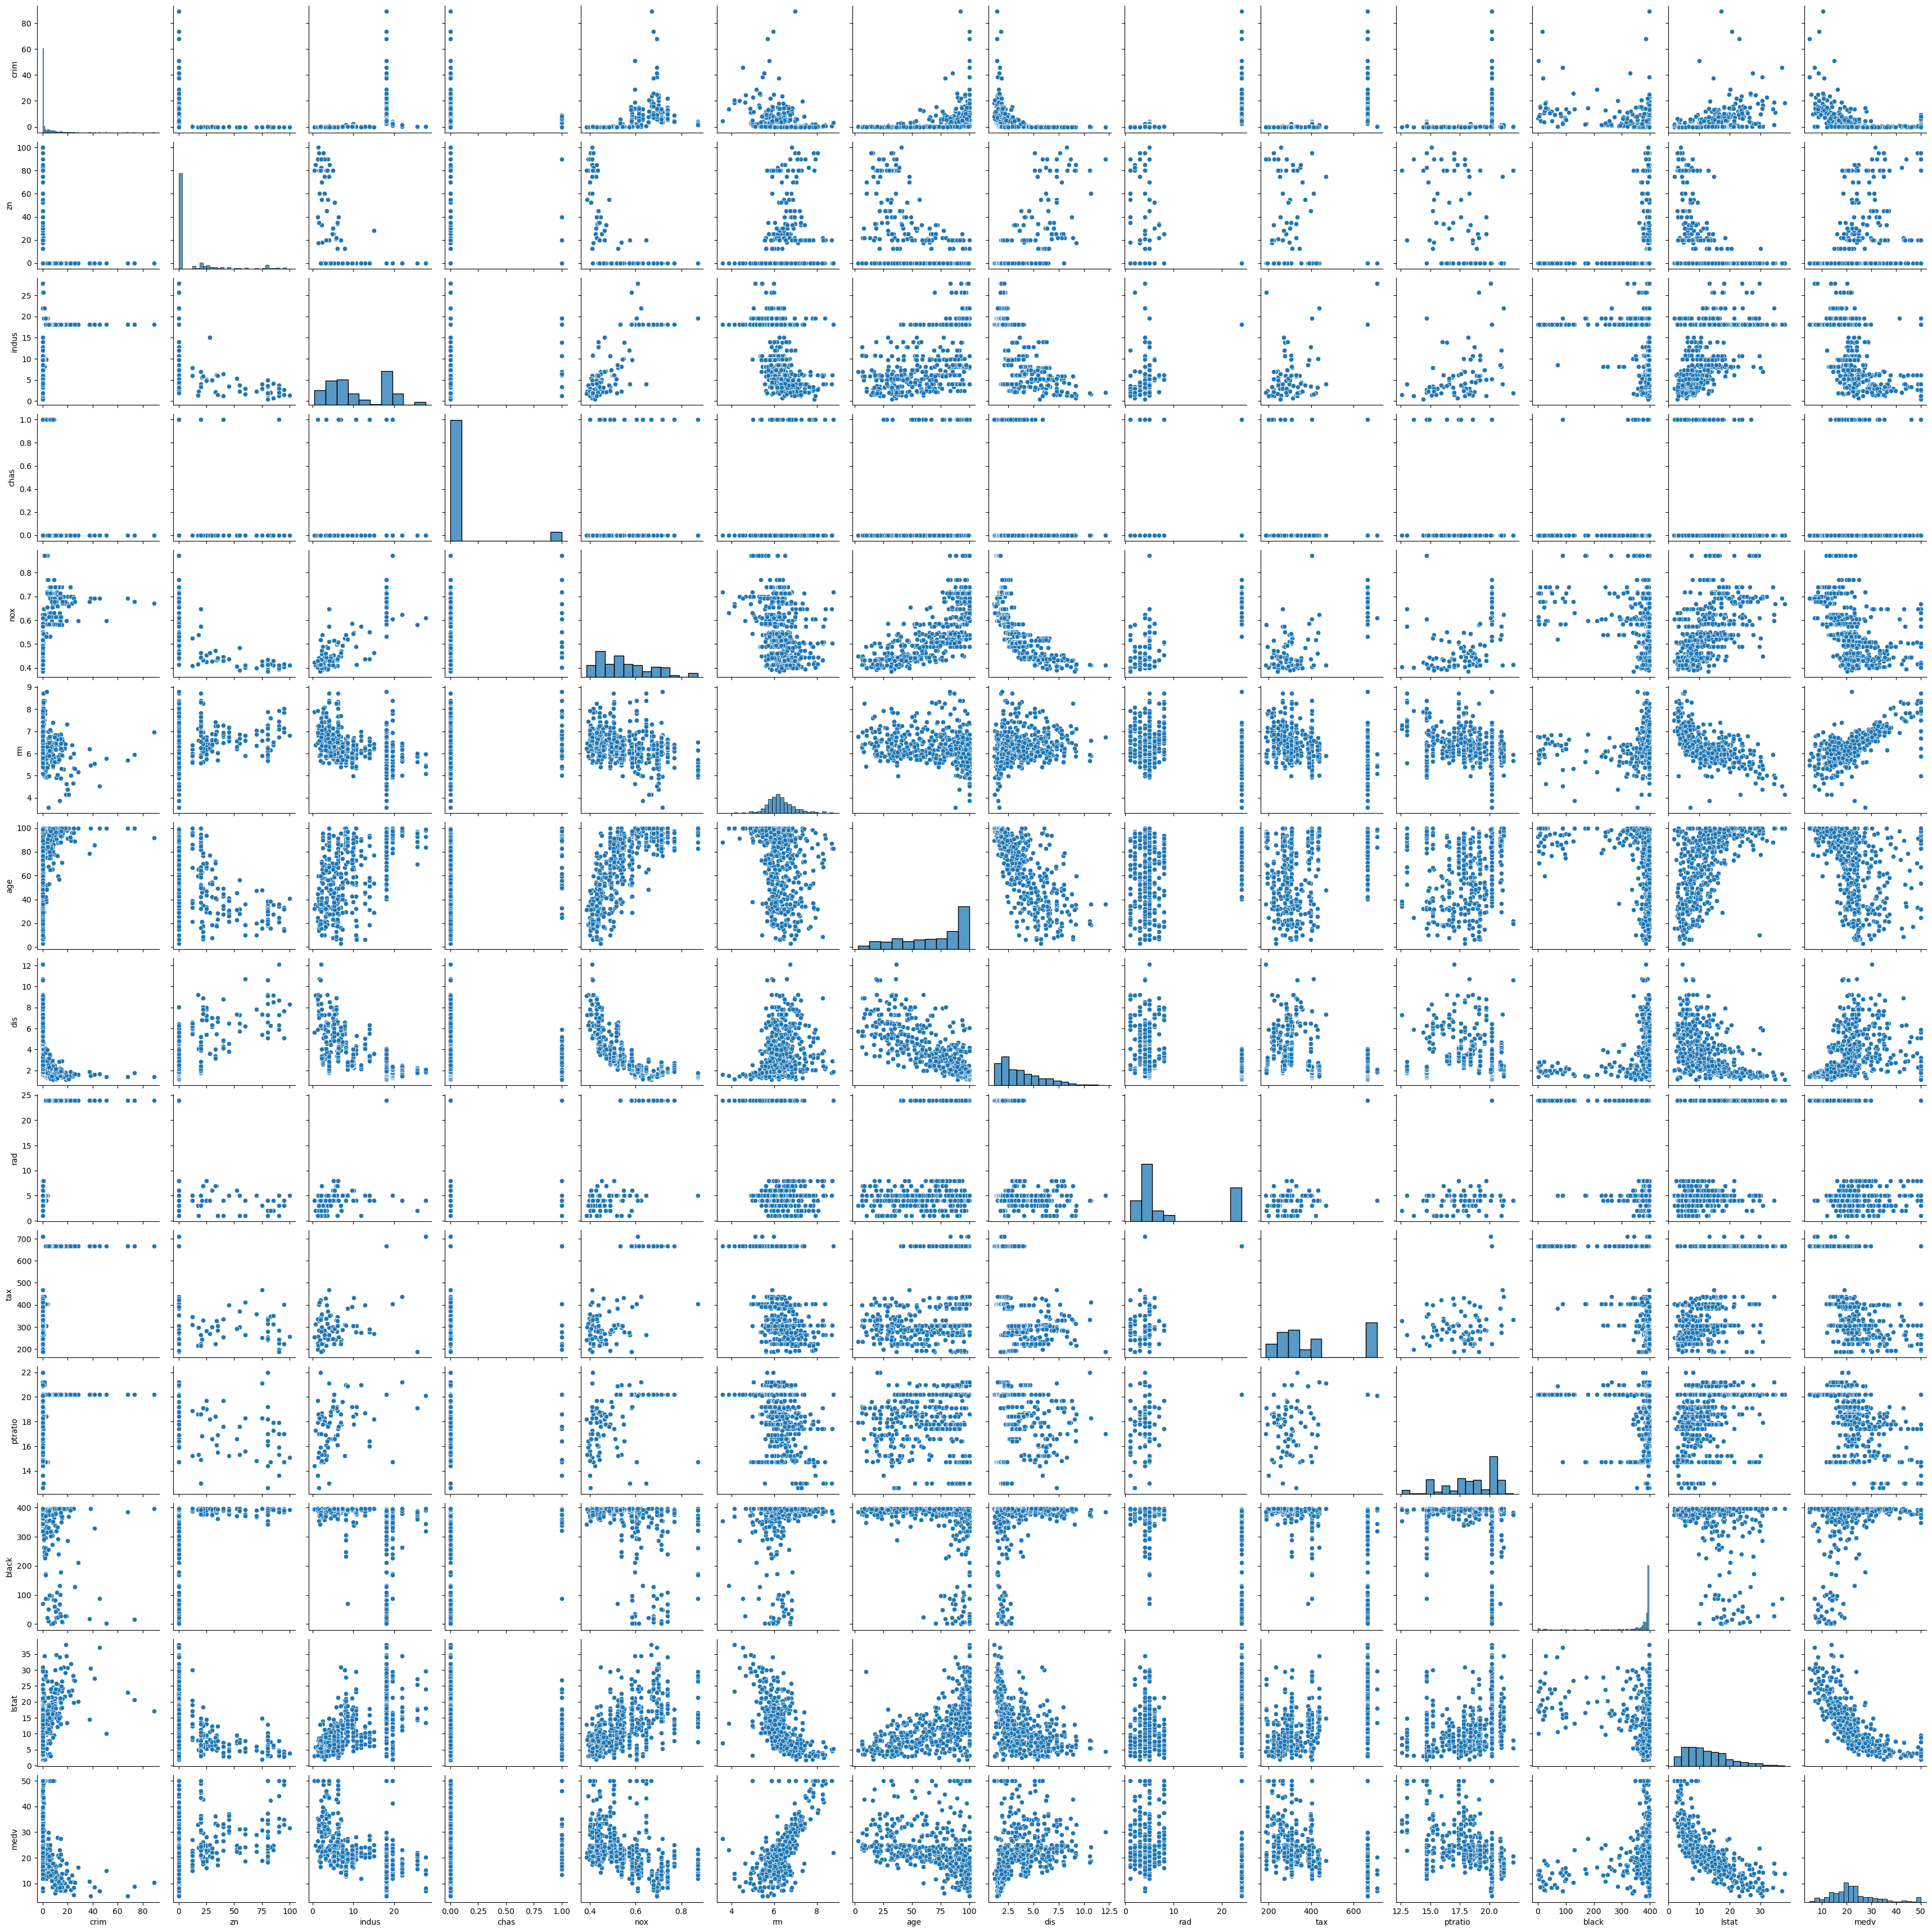

In [42]:
sns.pairplot(df)